# Lecture 13: The Soft-Margin Support Vector Machine  
***

<img src="figs/cogs.jpg",width=1100,height=50>

**Reminder**: Scroll down and execute the Helper Functions at the bottom

<br>

### Problem 1: Soft-Margin SVM Example
***

Suppose you have the following labeled data set (assume here that red corresponds to $y=1$ and blue corresponds to $y = -1$) and suppose the SVM decision boundary is defined by the weights ${\bf w} = [-1/4, ~ 1/4]^T$ and $b = -1/4$. 


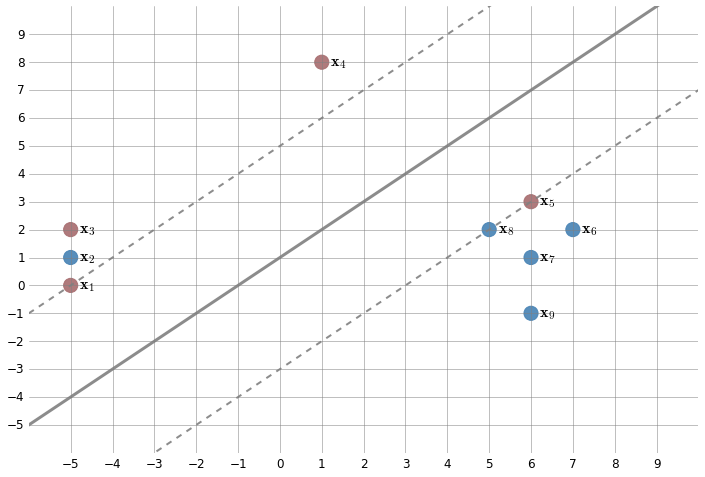

In [42]:
prob1plot()

**Q**: Which training examples are the support vectors? 

**Q**: Which training examples are the slack vectors (i.e. examples with nonzero slack? 

**Q**: Compute the slack $\xi_i$ associated with the misclassified points. 

**Q**: What is the interpretation of these slack variables? 

<br>

### Problem 2: General Soft-Margin Trivia
***

**Q**: Discuss the relationship between the support vectors (i.e. those training examples lying on the support vector boundaries) and the slack vectors (i.e. those training examples lying on the incorrect side of the support vector boundaries).  What are the values of their associated Lagrange multipliers?  How are each relevant to the determination of the weights in the SVM model? 



**Q**: Suppose you have determined the optimal dual parameters (the $\alpha$'s).  We've seen how we can recover the primal weight vector, but how could you recover the bias term $b$? 

<br>

### Problem 3: The Margin vs. Slackness Tradeoff 
***

The following function computes the SVM decision function for varying values of $C$ and choice of power on the slack variables.  Play with $C$ and the loss function and see what happens to the decision boundary.  Then answer the questions below.


Margin M =  0.694700291026


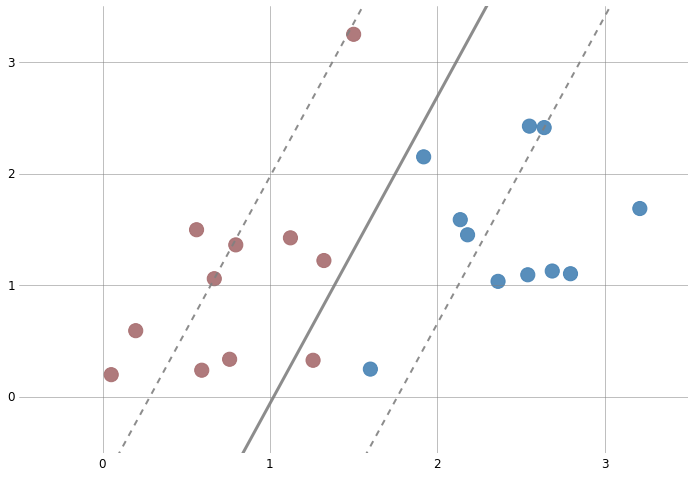

In [20]:
prob2(0.5, "hinge") 
# Replace "hinge" with "squared_hinge" to square 
# slack variables in objective function

**Q**: What are your observations about the relationship between the size of $C$ and the size of the margin? 

**Q**: Given a Soft-Margin SVM model with linearly separable data, how could you simulate the effects of a Hard-Margin SVM? 

**Q**: For fixed $C$ how do the different powers on the slack variables affect the margin?  Is this counterintuitive?  Can you think of a situation when this wouldn't be the case?  

<br><br><br>
<br><br><br>
## Problem Solutions

<br>

### Problem 1: Soft-Margin SVM Example
***

Suppose you have the following labeled data set (assume here that red corresponds to $y=1$ and blue corresponds to $y = -1$) and suppose the SVM decision boundary is defined by the weights ${\bf w} = [-1/4, ~ 1/4]^T$ and $b = -1/4$. 


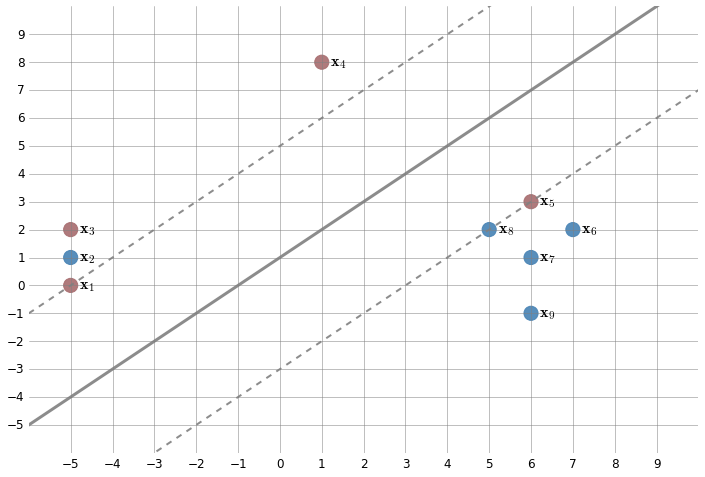

In [42]:
prob1plot()

**Q**: Which training examples are the support vectors? 

**A**: From the data it is a fair assumption that red points above the decision boundary are clorrectly classified and blue points below the decision boundary are correctly classified.  From this we see that ${\bf x}_1$ and ${\bf x}_5$ are support vectors. 

**Q**: Which training examples are the slack vectors (i.e. examples with nonzero slack? 

**A**: Examples ${\bf x}_2$ and ${\bf x}_5$ are on the wrong side of their support vector boundaries, so they are the only ones with nonzero slack. 

**Q**: Compute the slack $\xi_i$ associated with the misclassified points. 

**A**: We will use the definition $y_i({\bf w}^T{\bf x}_i + b ) = 1 - \xi_i$ to compute the slack 

For ${\bf x}_2$ we have 

$$
y_2 ({\bf w}^T{\bf x}_2 + b) = -1\left(-\frac{1}{4} \cdot -5 + \frac{1}{4} \cdot 1 - \frac{1}{4}\right) = -\frac{5}{4}
\quad \textrm{then} \quad 1 - \xi_2 = -\frac{5}{4} \quad \Rightarrow \quad \xi_2 = \frac{9}{4} = 2.25 
$$

Similarly for ${\bf x}_5$ we have 

$$
y_5 ({\bf w}^T{\bf x}_5 + b) = 1\left(-\frac{1}{4} \cdot 6 + \frac{1}{4} \cdot 3 - \frac{1}{4}\right) = -1
\quad \textrm{then} \quad 1 - \xi_5 = -1 \quad \Rightarrow \quad \xi_5 = 2 
$$

**Q**: What is the interpretation of these slack variables? 

**A**:  You can interpret the slack variables as the number of margins the misclassified point is away from it's correct support vector boundary.  We see that in the case of ${\bf x}_5$ the training example is exactly 2 margins away from the correct support vector boundary.  Similarly ${\bf x}_2$ is a little more than 2 margins away from the correct support vector boundary. 

<br>

### Problem 2: General Soft-Margin Trivia
***

**Q**: Discuss the relationship between the support vectors (i.e. those training examples lying on the support vector boundaries) and the slack vectors (i.e. those training examples lying on the incorrect side of the support vector boundaries).  What are the values of their associated Lagrange multipliers?  How are each relevant to the determination of the weights in the SVM model? 



**A**: A support vector has Lagrange multiplier $0 < \alpha < C$ and $\xi = 0$.  A slack vector has $\alpha = C$ and $\xi > 0$.  Recall that the weight vector is determined from the dual parameters by 

$$
{\bf w} = \sum_{i=1}^m \alpha_i y_i {\bf x}_i 
$$

Since both the support vectors and slack vectors have $\alpha \neq 0$ they each contribute to the model weights.  Some people refer to both types of vectors as support vectors and distinguish between the two by calling the support vectors _In-Bound SVs_ and the slack vectors _Bound SVs_.  I prefer our terminology. 

**Q**: Suppose you have determined the optimal dual parameters (the $\alpha$'s).  We've seen how we can recover the primal weight vector, but how could you recover the bias term $b$? 

**A**: Take any support vector ${\bf x}_s$ which has associated $0 < \alpha_s < C$ and $\xi_s = 0$.  Plugging this into the linear constraint gives   


$$
y_s({\bf w}^T{\bf x}_s + b) = 1 \quad \Rightarrow \quad {\bf w}^T{\bf x} + b = y_s \quad \Rightarrow \quad b = y_s - {\bf w}^T{\bf x}_s
$$


<br>

### Problem 3: The Margin vs. Slackness Tradeoff 
***

The following function computes the SVM decision function for varying values of $C$ and choice of power on the slack variables.  Play with $C$ and the loss function and see what happens to the decision boundary.  Then answer the questions below.


Margin M =  0.694700291026


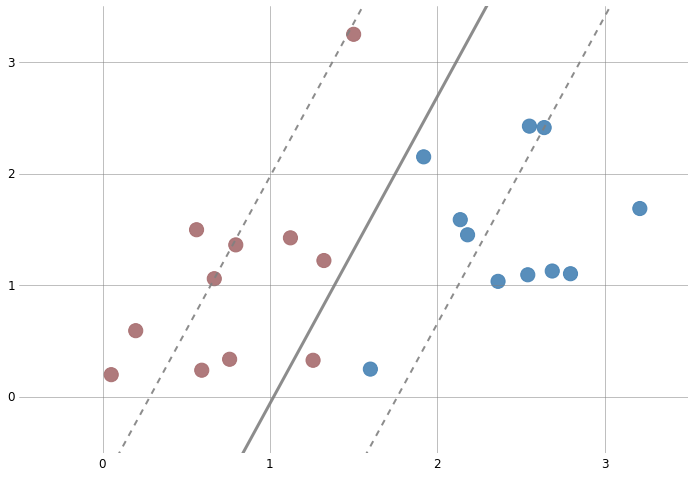

In [22]:
prob2(0.5, "hinge") 
# Replace "hinge" with "squared_hinge" to square 
# slack variables in objective function

**Q**: What are your observations about the relationship between the size of $C$ and the size of the margin? 

**A**: As $C$ becomes larger the model attempts minimize the slack as much as possible.  This results in smaller margins.  As $C$ becomes smaller the slack is not penalized nearly as much in the objective function and the result is much larger margins.

**Q**: Given a Soft-Margin SVM model with linearly separable data, how could you simulate the effects of a Hard-Margin SVM? 

**A**: Take $C \rightarrow \infty$.  As $C$ becomes very large the only thing the model will care about is minimizing the slack.  

**Q**: For fixed $C$ how do the different powers on the slack variables affect the margin?  Is this counterintuitive?  Can you think of a situation when this wouldn't be the case?  

**A**: For fixed values of $C$ the squared hinge function always produces a larger margin. This is a result of the distribution of the data.  Notice that the training data is in fact linearly separable.  This means that any slack vectors will be within one margin of their respective support vector boundaries.  Since the slack variables are all less than 1, squaring the slack actually un-weights the slack terms in the objective function, thus producing a larger margin. 

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
%matplotlib inline

def prob1plot():
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([
            [-5,0], 
            [-5,1], 
            [-5,2],
            [ 1,8],
            [ 5,2],
            [ 6,3],
            [ 6,1],
            [ 6,-1],
            [ 7,2],
        ])
    y = np.array([
             1,
            -1,
             1,
             1,
            -1,
             1,
            -1,
            -1,
            -1,
        ])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    x = np.linspace(-6,10,2) 
    plt.plot(x, x + 1, color="gray", lw=3, alpha=0.9)
    plt.plot(x, x + 5, color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, x - 3, color="gray", lw=2, ls="--", alpha=0.9)
    ax.text(X[0,0]+.2,X[0,1]-.1,r"${\bf x}_1$", fontsize=16)
    ax.text(X[1,0]+.2,X[1,1]-.1,r"${\bf x}_2$", fontsize=16)
    ax.text(X[2,0]+.2,X[2,1]-.1,r"${\bf x}_3$", fontsize=16)
    ax.text(X[3,0]+.2,X[3,1]-.1,r"${\bf x}_4$", fontsize=16)
    ax.text(X[4,0]+.2,X[4,1]-.1,r"${\bf x}_8$", fontsize=16)
    ax.text(X[5,0]+.2,X[5,1]-.1,r"${\bf x}_5$", fontsize=16)
    ax.text(X[6,0]+.2,X[6,1]-.1,r"${\bf x}_7$", fontsize=16)
    ax.text(X[7,0]+.2,X[7,1]-.1,r"${\bf x}_9$", fontsize=16)
    ax.text(X[8,0]+.2,X[8,1]-.1,r"${\bf x}_6$", fontsize=16)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-6,10])
    plt.ylim([-6,10])
    
def prob2(C=1.0, loss="hinge"):
    
    np.random.seed(1239)
    
    X = np.zeros((22,2))
    X[0:10,0]  = 1.5*np.random.rand(10) 
    X[0:10,1]  = 1.5*np.random.rand(10)
    X[10:20,0] = 1.5*np.random.rand(10) +  1.75
    X[10:20,1] = 1.5*np.random.rand(10) +  1
    X[20,0] = 1.5
    X[20,1] = 3.25
    X[21,0] = 1.6
    X[21,1] = 0.25
    
    y = np.ones(22)
    y[10:20] = -1 
    y[20] = 1
    y[21] = -1
    
    clf = LinearSVC(C=C, loss=loss)
    clf.fit(X,y)
    b = clf.intercept_
    w = clf.coef_[0]
    
    # Plot data 
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    
    # Plot SVM boundaries 
    x = np.linspace(-6,10, 10)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1], color="gray", lw=3, alpha=0.9)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1] + 1/w[1], color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1] - 1/w[1], color="gray", lw=2, ls="--", alpha=0.9)
    
    # Plot Settings 
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([0,1,2,3], fontsize=12)
    plt.yticks([0,1,2,3], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    
    # Print the margin
    normW = np.linalg.norm(w)
    M = 1.0/normW 
    print "Margin M = ", M 